In [1]:
import warnings

warnings.filterwarnings("ignore")

# Learning goals
After today's lesson you should be able to:
- Implement classification models

In [19]:
import numpy as np
import pandas as pd
import geopandas as gpd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

import contextily

# Predicting Income
We are going to use a dataset from the University of California Urvine's [Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php). 

# 0. Data
This is a dataset that has been extract from the 1994 Census and contains 48,842 observations. 

Here is the list of attributes: 

- income: >50K, <=50K.
- age: continuous.
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- fnlwgt: continuous.
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- education-num: continuous.
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- sex: Female, Male.
- capital-gain: continuous.
- capital-loss: continuous.
- hours-per-week: continuous.
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.



## 0.1 Import the data

In [172]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
data = pd.read_csv(url, header=None)
columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']
data.columns = columns

In [100]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## 0.2 Clean the data

In [101]:
## Replace the data coded "?"" with NaN
data = data.replace(' ?', np.nan)
## Next, drop all rows with NaN
data = data.dropna()


# 1. Exploratory data analysis

In [102]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30162 non-null  int64 
 1   workclass       30162 non-null  object
 2   fnlwgt          30162 non-null  int64 
 3   education       30162 non-null  object
 4   education-num   30162 non-null  int64 
 5   marital-status  30162 non-null  object
 6   occupation      30162 non-null  object
 7   relationship    30162 non-null  object
 8   race            30162 non-null  object
 9   sex             30162 non-null  object
 10  capital-gain    30162 non-null  int64 
 11  capital-loss    30162 non-null  int64 
 12  hours-per-week  30162 non-null  int64 
 13  native-country  30162 non-null  object
 14  income          30162 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [103]:
data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,30162.000000,3.016200e+04,30162.000000,30162.000000,30162.000000,30162.000000
mean,38.437902,1.897938e+05,10.121312,1092.007858,88.372489,40.931238
std,13.134665,1.056530e+05,2.549995,7406.346497,404.298370,11.979984
min,17.000000,1.376900e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.176272e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.784250e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.376285e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


<AxesSubplot: xlabel='count', ylabel='income'>

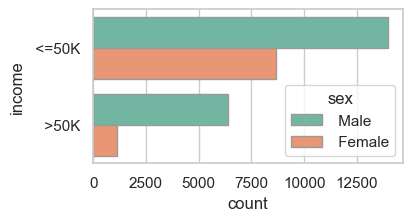

In [62]:
fig,ax = plt.subplots(1,1,figsize=(4,2))
sns.countplot(data = data , y='income',hue = 'sex',palette='Set2',edgecolor=".6",ax=ax)

<AxesSubplot: xlabel='count', ylabel='occupation'>

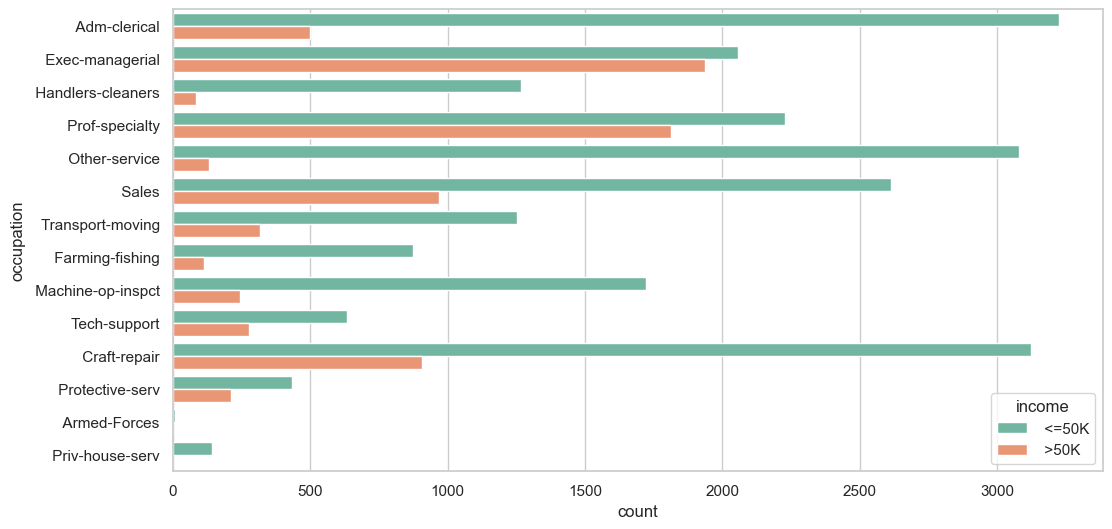

In [72]:
fig,ax = plt.subplots(1,1,figsize=(12,6))
sns.countplot(data = data , y='occupation',hue = 'income',palette='Set2',ax=ax)

Note that we can also make these vertical bar charts, but I think charts the horizontal ones look better because of the text is not squeezed on the y-axis in teh case of many categories. 

<AxesSubplot: xlabel='occupation', ylabel='count'>

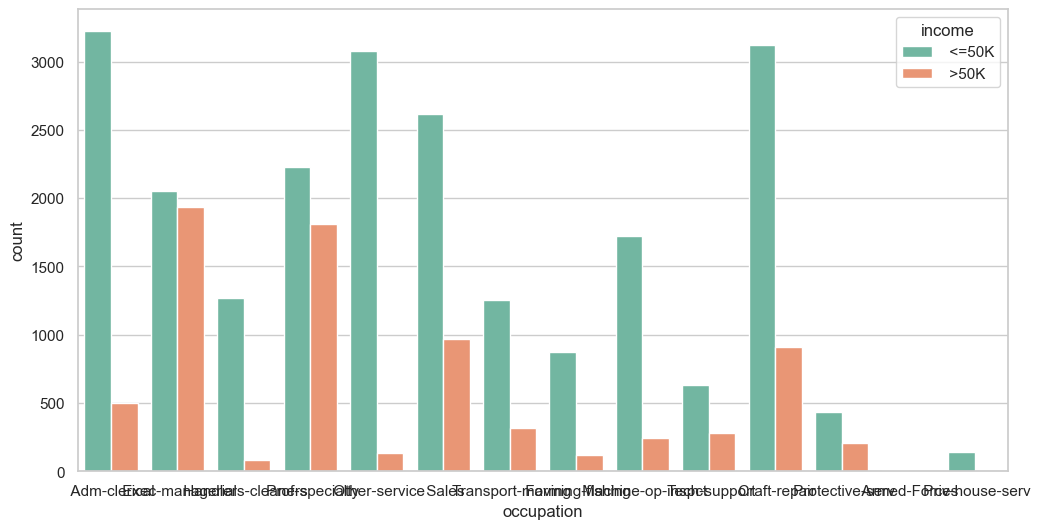

In [73]:
fig,ax = plt.subplots(1,1,figsize=(12,6))

sns.countplot(data = data , x='occupation',hue = 'income',palette='Set2',ax=ax)

<AxesSubplot: xlabel='count', ylabel='occupation'>

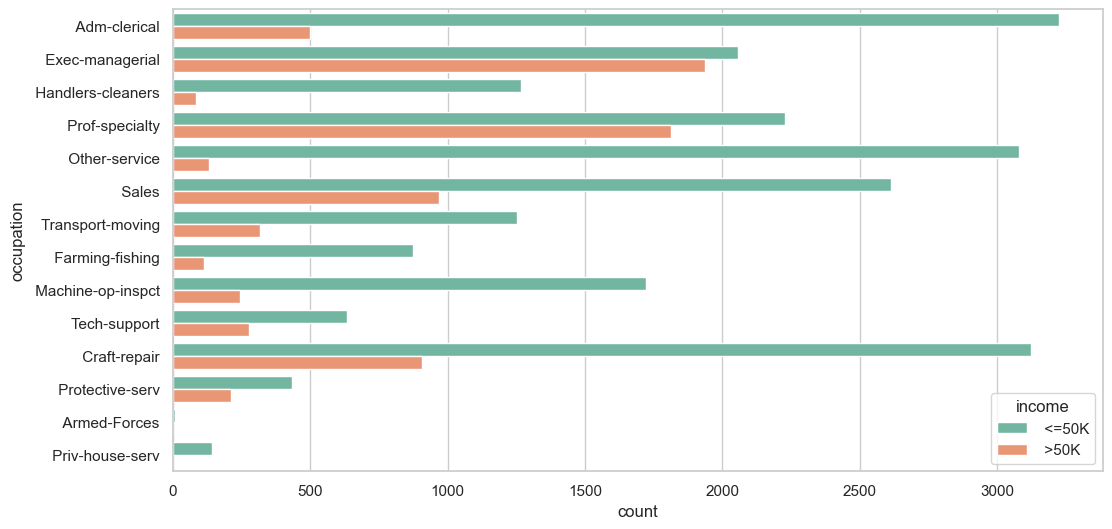

In [66]:
fig,ax = plt.subplots(1,1,figsize=(12,6))
sns.countplot(data = data , y='occupation',hue = 'income',palette='Set2',ax=ax)

<AxesSubplot: xlabel='count', ylabel='race'>

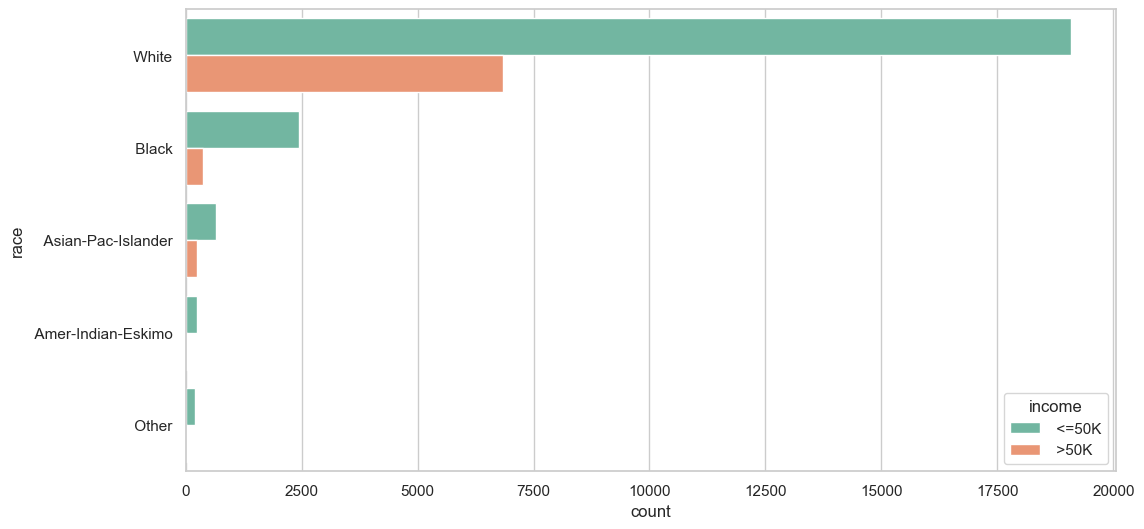

In [68]:
fig,ax = plt.subplots(1,1,figsize=(12,6))
sns.countplot(data = data , y='race',hue = 'income',palette='Set2',ax=ax)

array([[<AxesSubplot: title={'center': 'age'}>,
        <AxesSubplot: title={'center': 'fnlwgt'}>],
       [<AxesSubplot: title={'center': 'education-num'}>,
        <AxesSubplot: title={'center': 'capital-gain'}>],
       [<AxesSubplot: title={'center': 'capital-loss'}>,
        <AxesSubplot: title={'center': 'hours-per-week'}>]], dtype=object)

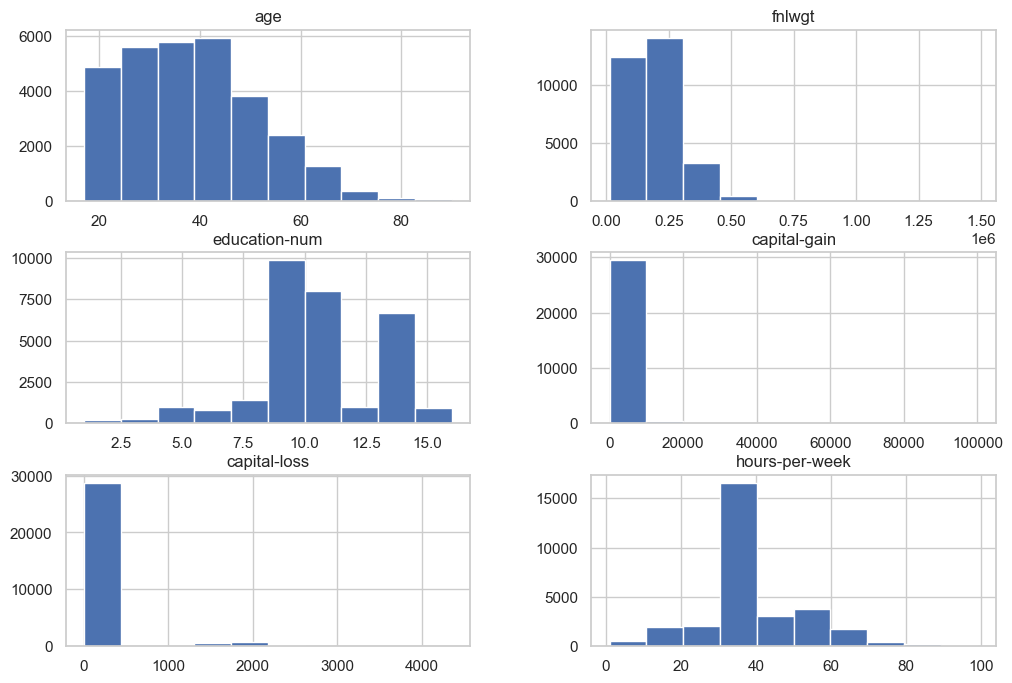

In [109]:
data[['age','fnlwgt','education-num','capital-gain','capital-loss','hours-per-week']].hist(figsize=(12,8))

# 2. Prep data for training

## 2.1 Encode categorical variables to numbers

In [173]:
## Create a new dataframe with only the numerical data
data_num = data[['age','fnlwgt','education-num','capital-gain','capital-loss','hours-per-week']]

In [174]:
# in machine learning, we often want to convert categorical variables to numerical
# so that 
# Convert categorical variables to numerical
categorical_cols = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'income']
dummy_df_list = []
for col in categorical_cols:
    dummy_df = pd.get_dummies(data[col], prefix=col)
    dummy_df_list.append(dummy_df)

data_dummy = pd.concat(dummy_df_list, axis=1)

In [176]:
data_new = pd.concat([data_num, data_dummy], axis=1)

In [177]:
data_new.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,...,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia,income_ <=50K,income_ >50K
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,38,215646,9,0,0,40,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
3,53,234721,7,0,0,40,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
4,28,338409,13,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [178]:
## We are going to set all the non-income columns as X
X = data_new[data_new.columns.difference(['income_ >50K', 'income_ <=50K'])]
y = data_new['income_ >50K']

## 2.2 Create a training and test set

In [179]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# 3. Modeling

## 3.1 Model using Naive Bayes

Model using our training data. 

In [180]:
%%time
## We can use %%time to see how long it takes to run the code
## %% are called magic functions in Jupyter Notebook

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

## Train the model on the training data
gnb.fit(X_train, y_train)

CPU times: user 23.9 ms, sys: 13 ms, total: 36.9 ms
Wall time: 35.6 ms


GaussianNB()

Get the prediction for the test set. 

In [181]:
y_pred = gnb.predict(X_test)

In [182]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [183]:
from sklearn.metrics import accuracy_score
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.7992741485203797


Alternatively, we can use the score method to get the accuracy of the model

In [184]:

gnb.score(X_test, y_test)

0.7992741485203797

Let's also take a look at the confusion matrix

In [185]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[7795,  401],
       [1756,  794]])

Divide by the total number to get percentages. 

In [187]:
cm = confusion_matrix(y_test, y_pred)/len(y_test)

In [191]:
cm

array([[0.72538619, 0.03731621],
       [0.16340964, 0.07388796]])

In [192]:
print(f"We have a {cm[0][0]*100:.{2}}% true negative rate and a {cm[1][1]*100:.{2}}% % true positive rate.\n We have a {cm[1][0]*100:.{2}}% false negative rate and a {cm[0][1]*100:.{2}}% false positive rate. \n Note that our upper-right and lower-left (TP, TN) sum to the accuracy score. " )

We have a 7.3e+01% true negative rate and a 7.4% % true positive rate.
 We have a 1.6e+01% false negative rate and a 3.7% false positive rate. 
 Note that our upper-right and lower-left (TP, TN) sum to the accuracy score. 


## 3.2 Support Vector Machine

In [193]:
%%time

## SVC() is a support vector classifier 
## There is also a support vector regressor SVR()
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

CPU times: user 28.8 s, sys: 139 ms, total: 28.9 s
Wall time: 28.9 s


Notice that took a lot longer to run than the Naive Bayes! And the model performed slightly worse.

In [196]:
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.7964824120603015


We also have a higher false negative rate, too. 

In [197]:
cm = confusion_matrix(y_test, y_pred)/len(y_test)

In [198]:
print(f"We have a {cm[0][0]*100:.{2}}% true negative rate and a {cm[1][1]*100:.{2}}% % true positive rate.\n We have a {cm[1][0]*100:.{2}}% false negative rate and a {cm[0][1]*100:.{2}}% false positive rate. " )

We have a 7.6e+01% true negative rate and a 3.4% % true positive rate.
 We have a 2e+01% false negative rate and a 0.037% false positive rate. 


## 3.3 Decision Tree

In [199]:
%%time
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

CPU times: user 139 ms, sys: 1.57 ms, total: 140 ms
Wall time: 139 ms


In [200]:
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.8148148148148148


In [201]:
confusion_matrix(y_test, y_pred)/len(y_test)

array([[0.66657361, 0.09612879],
       [0.08905639, 0.14824121]])

## 3.4 Random Forest

In [202]:
%%time
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

CPU times: user 1.75 s, sys: 5.39 ms, total: 1.75 s
Wall time: 1.75 s


In [203]:
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.8534338358458962


In [204]:
confusion_matrix(y_test, y_pred)/len(y_test)

array([[0.70742602, 0.05527638],
       [0.09128978, 0.14600782]])

Faster than the support vector machine and with better accuracy and false negatives. 

## 3.5 Gradient Boosting Trees

In [205]:
%%time
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()

gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)

CPU times: user 2.72 s, sys: 4.95 ms, total: 2.72 s
Wall time: 2.72 s


In [206]:
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.8689745021403313


In [207]:
confusion_matrix(y_test, y_pred)/len(y_test)

array([[0.72510702, 0.03759538],
       [0.09343011, 0.14386749]])

Even better. This will not always be the case. However, ensemble learning methods very often outperform other types of machine learning models because they combine multiple models to make more accurate predictions. 

# Q.1
- Using this same dataset, try to predict to predict gender based on other categories. Which model performed the best and by what metrics (time? accuracy? false predictions?) did you determine this. (5 pts)
- Instead of a 66/33 split, try a 80/20 split on your best performing model. Did this improve your model performance? (5 pts)

